In [1]:
import numpy as np
import pyaudio
import matplotlib.pyplot as plt
import wave
import sys

/home/jugs/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:26: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.


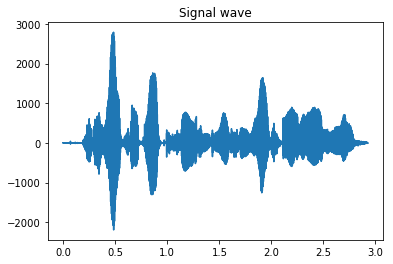

In [ ]:
class AudioFile:
    CHUNK = 1024

    def __init__(self, file):
        self.f = wave.open(file)
        self.p = pyaudio.PyAudio()
        self.stream = self.p.open(format = self.p.get_format_from_width(self.f.getsampwidth()),
                        channels = self.f.getnchannels(),
                        rate = self.f.getframerate(),
                        output = True)

    def play(self):
        data = self.f.readframes(1024)

        while data != "":
            self.stream.write(data)
            data = self.f.readframes(1024)

    def close(self):
        self.stream.stop_stream()
        self.stream.close()
        self.p.terminate()

    def plotAudio(self):
        signal = self.f.readframes(-1)
        signal = np.fromstring(signal, 'Int16')
        fs = self.f.getframerate()

        if self.f.getnchannels() == 2:
            print('just mono files')
            sys.exit(0)

        Time = np.linspace(0, len(signal)/fs, num=len(signal))

        plt.figure(1)
        plt.title('Signal wave')
        plt.plot(Time, signal)
        plt.show()

a = AudioFile('/home/jugs/Downloads/LDC93S1.wav')
a.plotAudio()
a.play()
a.close()        